<h1 style="color:red"><center><i>Fetal Health</i></center></h1>

## **Table of Content**
   * [Dataset Information](#Information)
   * [Load the dataset](#Dataset)
   * [Data Understanding (Exploratory Data Analysis)](#EDA)
   * [Descriptive Features](#Descriptive)
   * [Target](#target)
   * [Pre-processing and Feature Selection](#Pre)
   * [Modelling](#model)
   * [Evaluate](#Evaluate)
   
## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

from sklearnex import patch_sklearn
patch_sklearn()

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.qualitative.D3,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates


plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=15,15 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## **Dataset Information** <a name="Information"></a>

- baseline value: Baseline Fetal Heart Rate (FHR) (beats per minute)
- accelerations: Number of accelerations per second
- fetal_movement: Number of fetal movements per second
- uterine_contractions: Number of uterine contractions per second
- light_decelerations: Number of light decelerations (LDs) per second
- severe_decelerations: Number of severe decelerations (SDs) per second
- prolongued_decelerations: Number of prolonged decelerations (PDs) per second
- abnormal_short_term_variability: Percentage of time with abnormal short term variability
- mean_value_of_short_term_variability: Mean value of short term variability
- percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability
- mean_value_of_long_term_variability: Mean value of long term variability
- histogram_width: Width of histogram made using all values from a record
- histogram_min: Histogram minimum value
- histogram_max: Histogram maximum value
- histogram_number_of_peaks: Number of peaks in the exam histogram
- histogram_number_of_zeroes: Number of zeros in the exam histogram
- histogram_mode: Histogram mode
- histogram_mean: Histogram mean
- histogram_median: Histogram median
- histogram_variance: Histogram variance
- histogram_tendency: Histogram tendency
- fetal_health: Encoded as 1-Normal; 2-Suspect; 3-Pathological. It is our very target column in the dataset.

## **Load The Data** <a name="Dataset"></a>

In [2]:
df = pd.read_csv("fetal_health.csv")
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  light_decelerations  severe_decelerations  prolongued_decelerations  abnormal_short_term_variability  mean_value_of_short_term_variability  percentage_of_time_with_abnormal_long_term_variability  mean_value_of_long_term_variability  histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  histogram_mean  histogram_median  histogram_variance  histogram_tendency  fetal_health
0           120.0          0.000             0.0                 0.000                0.000                   0.0                       0.0                             73.0                                   0.5                                               43.0                                       2.4             64.0           62.0          126.0                        2.0                         0.0           120.0           137.0             121.0                73.0                 1.0           2.0
1           132.0          0.006             0.0                 0.006                0.003                   0.0                       0.0                             17.0                                   2.1                                                0.0                                      10.4            130.0           68.0          198.0                        6.0                         1.0           141.0           136.0             140.0                12.0                 0.0           1.0
2           133.0          0.003             0.0                 0.008                0.003                   0.0                       0.0                             16.0                                   2.1                                                0.0                                      13.4            130.0           68.0          198.0                        5.0                         1.0           141.0           135.0             138.0                13.0                 0.0           1.0
3           134.0          0.003             0.0                 0.008                0.003                   0.0                       0.0                             16.0                                   2.4                                                0.0                                      23.0            117.0           53.0          170.0                       11.0                         0.0           137.0           134.0             137.0                13.0                 1.0           1.0
4           132.0          0.007             0.0                 0.008                0.000                   0.0                       0.0                             16.0                                   2.4                                                0.0                                      19.9            117.0           53.0          170.0                        9.0                         0.0           137.0           136.0             138.0                11.0                 1.0           1.0

## **Data Understanding (Exploratory Data Analysis)** <a name="EDA"></a>

In [3]:
df.shape

(2126, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.describe(include='all')

baseline value  accelerations  fetal_movement  uterine_contractions  light_decelerations  severe_decelerations  prolongued_decelerations  abnormal_short_term_variability  mean_value_of_short_term_variability  percentage_of_time_with_abnormal_long_term_variability  mean_value_of_long_term_variability  histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  histogram_mean  histogram_median  histogram_variance  histogram_tendency  fetal_health
count     2126.000000    2126.000000     2126.000000           2126.000000          2126.000000           2126.000000               2126.000000                      2126.000000                           2126.000000                                         2126.00000                               2126.000000      2126.000000    2126.000000    2126.000000                2126.000000                 2126.000000     2126.000000     2126.000000       2126.000000         2126.000000         2126.000000   2126.000000
mean       133.303857       0.003178        0.009481              0.004366             0.001889              0.000003                  0.000159                        46.990122                              1.332785                                            9.84666                                  8.187629        70.445908      93.579492     164.025400                   4.068203                    0.323612      137.452023      134.610536        138.090310           18.808090            0.320320      1.304327
std          9.840844       0.003866        0.046666              0.002946             0.002960              0.000057                  0.000590                        17.192814                              0.883241                                           18.39688                                  5.628247        38.955693      29.560212      17.944183                   2.949386                    0.706059       16.381289       15.593596         14.466589           28.977636            0.610829      0.614377
min        106.000000       0.000000        0.000000              0.000000             0.000000              0.000000                  0.000000                        12.000000                              0.200000                                            0.00000                                  0.000000         3.000000      50.000000     122.000000                   0.000000                    0.000000       60.000000       73.000000         77.000000            0.000000           -1.000000      1.000000
25%        126.000000       0.000000        0.000000              0.002000             0.000000              0.000000                  0.000000                        32.000000                              0.700000                                            0.00000                                  4.600000        37.000000      67.000000     152.000000                   2.000000                    0.000000      129.000000      125.000000        129.000000            2.000000            0.000000      1.000000
50%        133.000000       0.002000        0.000000              0.004000             0.000000              0.000000                  0.000000                        49.000000                              1.200000                                            0.00000                                  7.400000        67.500000      93.000000     162.000000                   3.000000                    0.000000      139.000000      136.000000        139.000000            7.000000            0.000000      1.000000
75%        140.000000       0.006000        0.003000              0.007000             0.003000              0.000000                  0.000000                        61.000000                              1.700000                                           11.00000                                 10.800000       100.000000     120.000000     174.000000                   6.000000                    0.000000

In [6]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [7]:
list(df)

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health']

In [8]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [9]:
df.head(10)

baseline value  accelerations  fetal_movement  uterine_contractions  light_decelerations  severe_decelerations  prolongued_decelerations  abnormal_short_term_variability  mean_value_of_short_term_variability  percentage_of_time_with_abnormal_long_term_variability  mean_value_of_long_term_variability  histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  histogram_mean  histogram_median  histogram_variance  histogram_tendency  fetal_health
0           120.0          0.000             0.0                 0.000                0.000                   0.0                     0.000                             73.0                                   0.5                                               43.0                                       2.4             64.0           62.0          126.0                        2.0                         0.0           120.0           137.0             121.0                73.0                 1.0           2.0
1           132.0          0.006             0.0                 0.006                0.003                   0.0                     0.000                             17.0                                   2.1                                                0.0                                      10.4            130.0           68.0          198.0                        6.0                         1.0           141.0           136.0             140.0                12.0                 0.0           1.0
2           133.0          0.003             0.0                 0.008                0.003                   0.0                     0.000                             16.0                                   2.1                                                0.0                                      13.4            130.0           68.0          198.0                        5.0                         1.0           141.0           135.0             138.0                13.0                 0.0           1.0
3           134.0          0.003             0.0                 0.008                0.003                   0.0                     0.000                             16.0                                   2.4                                                0.0                                      23.0            117.0           53.0          170.0                       11.0                         0.0           137.0           134.0             137.0                13.0                 1.0           1.0
4           132.0          0.007             0.0                 0.008                0.000                   0.0                     0.000                             16.0                                   2.4                                                0.0                                      19.9            117.0           53.0          170.0                        9.0                         0.0           137.0           136.0             138.0                11.0                 1.0           1.0
5           134.0          0.001             0.0                 0.010                0.009                   0.0                     0.002                             26.0                                   5.9                                                0.0                                       0.0            150.0           50.0          200.0                        5.0                         3.0            76.0           107.0             107.0               170.0                 0.0           3.0
6           134.0          0.001             0.0                 0.013                0.008                   0.0                     0.003                             29.0                                   6.3                                                0.0                                       0.0            150.0           50.0          200.0                        6.0                         3.0            71.0           1

In [10]:
df.head(10).T

0        1        2        3        4        5        6      7        8        9
baseline value                                      120.0  132.000  133.000  134.000  132.000  134.000  134.000  122.0  122.000  122.000
accelerations                                         0.0    0.006    0.003    0.003    0.007    0.001    0.001    0.0    0.000    0.000
fetal_movement                                        0.0    0.000    0.000    0.000    0.000    0.000    0.000    0.0    0.000    0.000
uterine_contractions                                  0.0    0.006    0.008    0.008    0.008    0.010    0.013    0.0    0.002    0.003
light_decelerations                                   0.0    0.003    0.003    0.003    0.000    0.009    0.008    0.0    0.000    0.000
severe_decelerations                                  0.0    0.000    0.000    0.000    0.000    0.000    0.000    0.0    0.000    0.000
prolongued_decelerations                              0.0    0.000    0.000    0.000    0.000    0.002    0.003    0.0    0.000    0.000
abnormal_short_term_variability                      73.0   17.000   16.000   16.000   16.000   26.000   29.000   83.0   84.000   86.000
mean_value_of_short_term_variability                  0.5    2.100    2.100    2.400    2.400    5.900    6.300    0.5    0.500    0.300
percentage_of_time_with_abnormal_long_term_vari...   43.0    0.000    0.000    0.000    0.000    0.000    0.000    6.0    5.000    6.000
mean_value_of_long_term_variability                   2.4   10.400   13.400   23.000   19.900    0.000    0.000   15.6   13.600   10.600
histogram_width                                      64.0  130.000  130.000  117.000  117.000  150.000  150.000   68.0   68.000   68.000
histogram_min                                        62.0   68.000   68.000   53.000   53.000   50.000   50.000   62.0   62.000   62.000
histogram_max                                       126.0  198.000  198.000  170.000  170.000  200.000  200.000  130.0  130.000  130.000
histogram_number_of_peaks                             2.0    6.000    5.000   11.000    9.000    5.000    6.000    0.0    0.000    1.000
histogram_number_of_zeroes                            0.0    1.000    1.000    0.000    0.000    3.000    3.000    0.0    0.000    0.000
histogram_mode                                      120.0  141.000  141.000  137.000  137.000   76.000   71.000  122.0  122.000  122.000
histogram_mean                                      137.0  136.000  135.000  134.000  136.000  107.000  107.000  122.0  122.000  122.000
histogram_median                                    121.0  140.000  138.000  137.000  138.000  107.000  106.000  123.0  123.000  123.000
histogram_variance                                   73.0   12.000   13.000   13.000   11.000  170.000  215.000    3.0    3.000    1.000
histogram_tendency                                    1.0    0.000    0.000    1.000    1.000    0.000    0.000    1.0    1.000    1.000
fetal_health                                          2.0    1.000    1.000    1.000    1.000    3.000    3.000    3.0    3.000    3.000

In [11]:
# plt.figure(figsize=(15,15))
# threshold = 0.60
# sns.set_style("whitegrid", {"axes.facecolor": ".0"})
# df_cluster2 = df.corr()
# mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
# plot_kws={"s": 1}
# sns.heatmap(df_cluster2,
#             cmap='RdYlBu',
#             annot=True,
#             mask=mask,
#             linewidths=0.2, 
#             linecolor='lightgrey').set_facecolor('white')

In [12]:
# plt.style.use('seaborn-white')
# plt.rcParams['figure.figsize']=25,25 
# plt.rcParams['font.family'] = 'Calibri'
# plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize']=20
# plt.rcParams['xtick.labelsize']=12
# plt.rcParams['ytick.labelsize']=12
# plt.rcParams['legend.fontsize']=12

# # plt.figure(figsize=(25,25))
# # sns.set_style("whitegrid", {"axes.facecolor": ".0"})
# df_cluster2 = df.corr()
# plot_kws={"s": 1}
# sns.clustermap(df_cluster2,
#                cmap='RdYlBu',
#                linewidths=0.1,
#                figsize=(20,20),
#                # threshold=0.6,
#                linecolor='white')

In [13]:
# %%time

# def corrdot(*args, **kwargs):
#     corr_r = args[0].corr(args[1])
#     corr_text = f"{corr_r:2.2f}".replace("0.", ".")
#     ax = plt.gca()
#     ax.set_axis_off()
#     marker_size = abs(corr_r) * 10000
#     ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap='RdYlBu',
#                vmin=-1, vmax=1, transform=ax.transAxes)
#     font_size = abs(corr_r) * 40 + 5
#     ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
#                 ha='center', va='center', fontsize=font_size)

# sns.set(style='white', font_scale=1.6)
# g = sns.PairGrid(df.select_dtypes(include=[np.number]), aspect=1.4, diag_sharey=False)

# g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black','lw': 1.5}, scatter_kws={'s':3,'alpha':0.3,'color':'darkgray'})
# g.map_diag(sns.distplot, kde_kws={'color': 'black'},hist_kws={'color':'gray','alpha':1,})
# g.map_upper(corrdot)

## **Descriptive Features** <a name="Descriptive"></a>

In [14]:
feature = 'baseline value'

In [15]:
features = list(df.columns)

In [16]:
# Checking The Null Values
for feature in features:
    print(feature + " - " + str(len(df[df[feature].isna()])))

baseline value - 0
accelerations - 0
fetal_movement - 0
uterine_contractions - 0
light_decelerations - 0
severe_decelerations - 0
prolongued_decelerations - 0
abnormal_short_term_variability - 0
mean_value_of_short_term_variability - 0
percentage_of_time_with_abnormal_long_term_variability - 0
mean_value_of_long_term_variability - 0
histogram_width - 0
histogram_min - 0
histogram_max - 0
histogram_number_of_peaks - 0
histogram_number_of_zeroes - 0
histogram_mode - 0
histogram_mean - 0
histogram_median - 0
histogram_variance - 0
histogram_tendency - 0
fetal_health - 0


In [17]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=16,8*len(df.columns)
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size']=16
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20

fig,ax = plt.subplots(nrows=len(df.columns),ncols=2,sharey=True)
fig.suptitle('fetal health vs feature')
i=0
for feature in features:
    try:
        ax[i,0].set_title('Actual Label')
        ax[i,1].set_title('Average Label')

        sns.scatterplot(x=df[feature],
                        y=df['fetal_health'],
                        s=100,
                        alpha=0.6,
                        linewidth=1,
                        edgecolor='black',
                        ax=ax[i,0])

        df_data = df
        temp = df_data[df_data[feature].isnull() == False][['fetal_health',feature]]
        temp['fetal_health'].replace([False, True], [0,1], inplace = True)
        temp['fetal_health'] = temp.groupby(feature)['fetal_health'].transform('mean')
        plt.xlabel(feature)
        plt.ylabel('fetal health')
        sns.scatterplot(x=temp[feature],
                        y=temp['fetal_health'],
                        s=100,
                        alpha=0.6,
                        linewidth=1,
                        edgecolor='black',
                        ax=ax[i,1])
    except:
        pass
    i+=1
sns.despine()

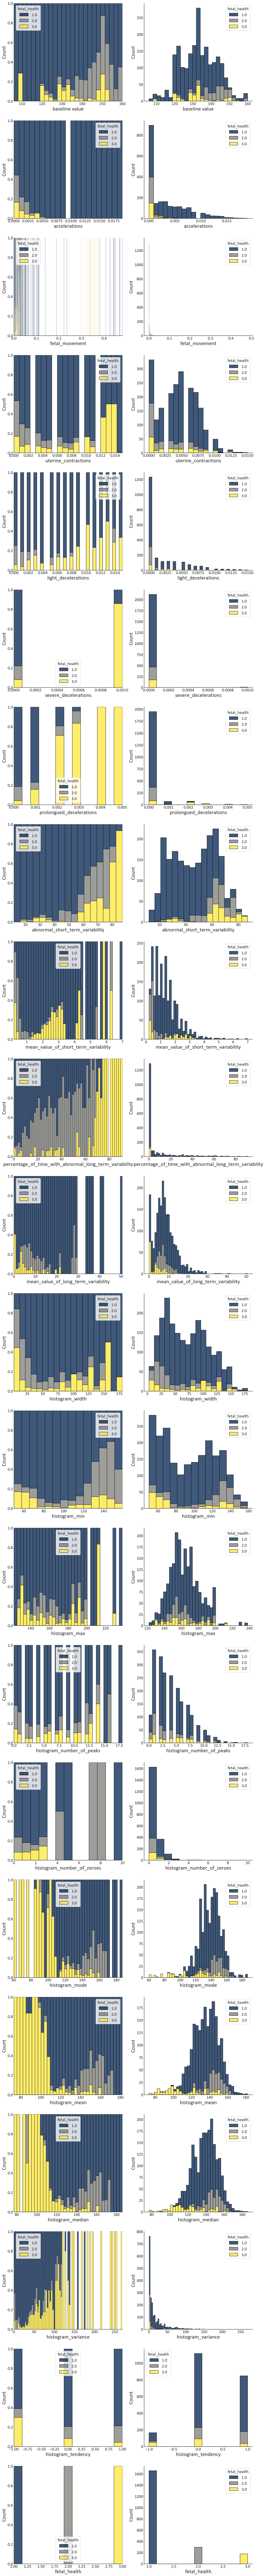

In [18]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=16,8*len(df.columns)
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16
plt.rcParams['legend.frameon']=True

fig,ax = plt.subplots(nrows=len(df.columns), ncols=2,)
i=0
for feature in features:

    sns.histplot(data = df,
                     x=feature,
                     hue='fetal_health',
                     palette='cividis',
                     multiple='fill',
                    ax=ax[i,0]
                        )

    sns.histplot(data = df,
                     x=feature,
                     hue='fetal_health',
                     palette='cividis',
                     multiple='stack',
                    ax=ax[i,1])
    i+=1
sns.despine()

## **target label** <a name="target"></a>

In [19]:
df_group = df.groupby(['fetal_health'])
df_group.count()

baseline value  accelerations  fetal_movement  uterine_contractions  light_decelerations  severe_decelerations  prolongued_decelerations  abnormal_short_term_variability  mean_value_of_short_term_variability  percentage_of_time_with_abnormal_long_term_variability  mean_value_of_long_term_variability  histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  histogram_mean  histogram_median  histogram_variance  histogram_tendency
fetal_health                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1.0                     1655           1655            1655                  1655                 1655                  1655                      1655                             1655                                  1655                                               1655                                      1655             1655           1655           1655                       1655                        1655            1655            1655              1655                1655                1655
2.0                      295            295             295                   295                  295                   295                       295                              295                                   295                                                295                                       295              295            295            295                        295                         295             295             295               295                 295                 295
3.0                      176            176             176                   176                  176                   176                       176                              176                                   176                                                176                                       176              176            176            176                        176                         176             176             176               176                 176                 176

In [20]:
df[df['fetal_health'].isna()]

Empty DataFrame
Columns: [baseline value, accelerations, fetal_movement, uterine_contractions, light_decelerations, severe_decelerations, prolongued_decelerations, abnormal_short_term_variability, mean_value_of_short_term_variability, percentage_of_time_with_abnormal_long_term_variability, mean_value_of_long_term_variability, histogram_width, histogram_min, histogram_max, histogram_number_of_peaks, histogram_number_of_zeroes, histogram_mode, histogram_mean, histogram_median, histogram_variance, histogram_tendency, fetal_health]
Index: []

## **Pre-processing and Feature Selection**<a name="Pre"></a>

The data quality report was generated for Post Block Assignment 1. This section will process and select the features in accordance with the recommendations of that report. 

### Drop irrelevant or excess features

The first feature to drop is 'id'. This feature is an index and not descriptive. Further the cabin and names are dropped since these cardinalities are too high and the set basically unique. Patterns were extracted from Cabin, but no discernable patterns of use from names. 

In [21]:
# make the true/false statements numeric - Python treats false as 0 and true as 1
df['Target']=df['fetal_health']+1-1

In [22]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  light_decelerations  severe_decelerations  prolongued_decelerations  abnormal_short_term_variability  mean_value_of_short_term_variability  percentage_of_time_with_abnormal_long_term_variability  mean_value_of_long_term_variability  histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  histogram_mean  histogram_median  histogram_variance  histogram_tendency  fetal_health  Target
0           120.0          0.000             0.0                 0.000                0.000                   0.0                       0.0                             73.0                                   0.5                                               43.0                                       2.4             64.0           62.0          126.0                        2.0                         0.0           120.0           137.0             121.0                73.0                 1.0           2.0     2.0
1           132.0          0.006             0.0                 0.006                0.003                   0.0                       0.0                             17.0                                   2.1                                                0.0                                      10.4            130.0           68.0          198.0                        6.0                         1.0           141.0           136.0             140.0                12.0                 0.0           1.0     1.0
2           133.0          0.003             0.0                 0.008                0.003                   0.0                       0.0                             16.0                                   2.1                                                0.0                                      13.4            130.0           68.0          198.0                        5.0                         1.0           141.0           135.0             138.0                13.0                 0.0           1.0     1.0
3           134.0          0.003             0.0                 0.008                0.003                   0.0                       0.0                             16.0                                   2.4                                                0.0                                      23.0            117.0           53.0          170.0                       11.0                         0.0           137.0           134.0             137.0                13.0                 1.0           1.0     1.0
4           132.0          0.007             0.0                 0.008                0.000                   0.0                       0.0                             16.0                                   2.4                                                0.0                                      19.9            117.0           53.0          170.0                        9.0                         0.0           137.0           136.0             138.0                11.0                 1.0           1.0     1.0

In [23]:
list_drop = ['fetal_health',
             'severe_decelerations',
             'histogram_mode',
             'histogram_median',
            ]
df.drop(list_drop,axis=1,inplace=True)

### Manage Missing Values

In [24]:
# show the numeric characters
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T


count        mean        std    min      25%      50%      75%      max
baseline value                                      2126.0  133.303857   9.840844  106.0  126.000  133.000  140.000  160.000
accelerations                                       2126.0    0.003178   0.003866    0.0    0.000    0.002    0.006    0.019
fetal_movement                                      2126.0    0.009481   0.046666    0.0    0.000    0.000    0.003    0.481
uterine_contractions                                2126.0    0.004366   0.002946    0.0    0.002    0.004    0.007    0.015
light_decelerations                                 2126.0    0.001889   0.002960    0.0    0.000    0.000    0.003    0.015
prolongued_decelerations                            2126.0    0.000159   0.000590    0.0    0.000    0.000    0.000    0.005
abnormal_short_term_variability                     2126.0   46.990122  17.192814   12.0   32.000   49.000   61.000   87.000
mean_value_of_short_term_variability                2126.0    1.332785   0.883241    0.2    0.700    1.200    1.700    7.000
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660  18.396880    0.0    0.000    0.000   11.000   91.000
mean_value_of_long_term_variability                 2126.0    8.187629   5.628247    0.0    4.600    7.400   10.800   50.700
histogram_width                                     2126.0   70.445908  38.955693    3.0   37.000   67.500  100.000  180.000
histogram_min                                       2126.0   93.579492  29.560212   50.0   67.000   93.000  120.000  159.000
histogram_max                                       2126.0  164.025400  17.944183  122.0  152.000  162.000  174.000  238.000
histogram_number_of_peaks                           2126.0    4.068203   2.949386    0.0    2.000    3.000    6.000   18.000
histogram_number_of_zeroes                          2126.0    0.323612   0.706059    0.0    0.000    0.000    0.000   10.000
histogram_mean                                      2126.0  134.610536  15.593596   73.0  125.000  136.000  145.000  182.000
histogram_variance                                  2126.0   18.808090  28.977636    0.0    2.000    7.000   24.000  269.000
histogram_tendency                                  2126.0    0.320320   0.610829   -1.0    0.000    0.000    1.000    1.000
Target                                              2126.0    1.304327   0.614377    1.0    1.000    1.000    1.000    3.000

### Best Features

This section does an analysis (univariate statistical tests) to determine which features best predict the target feature. 

[Text(0.5, 1.0, 'Best Features')]

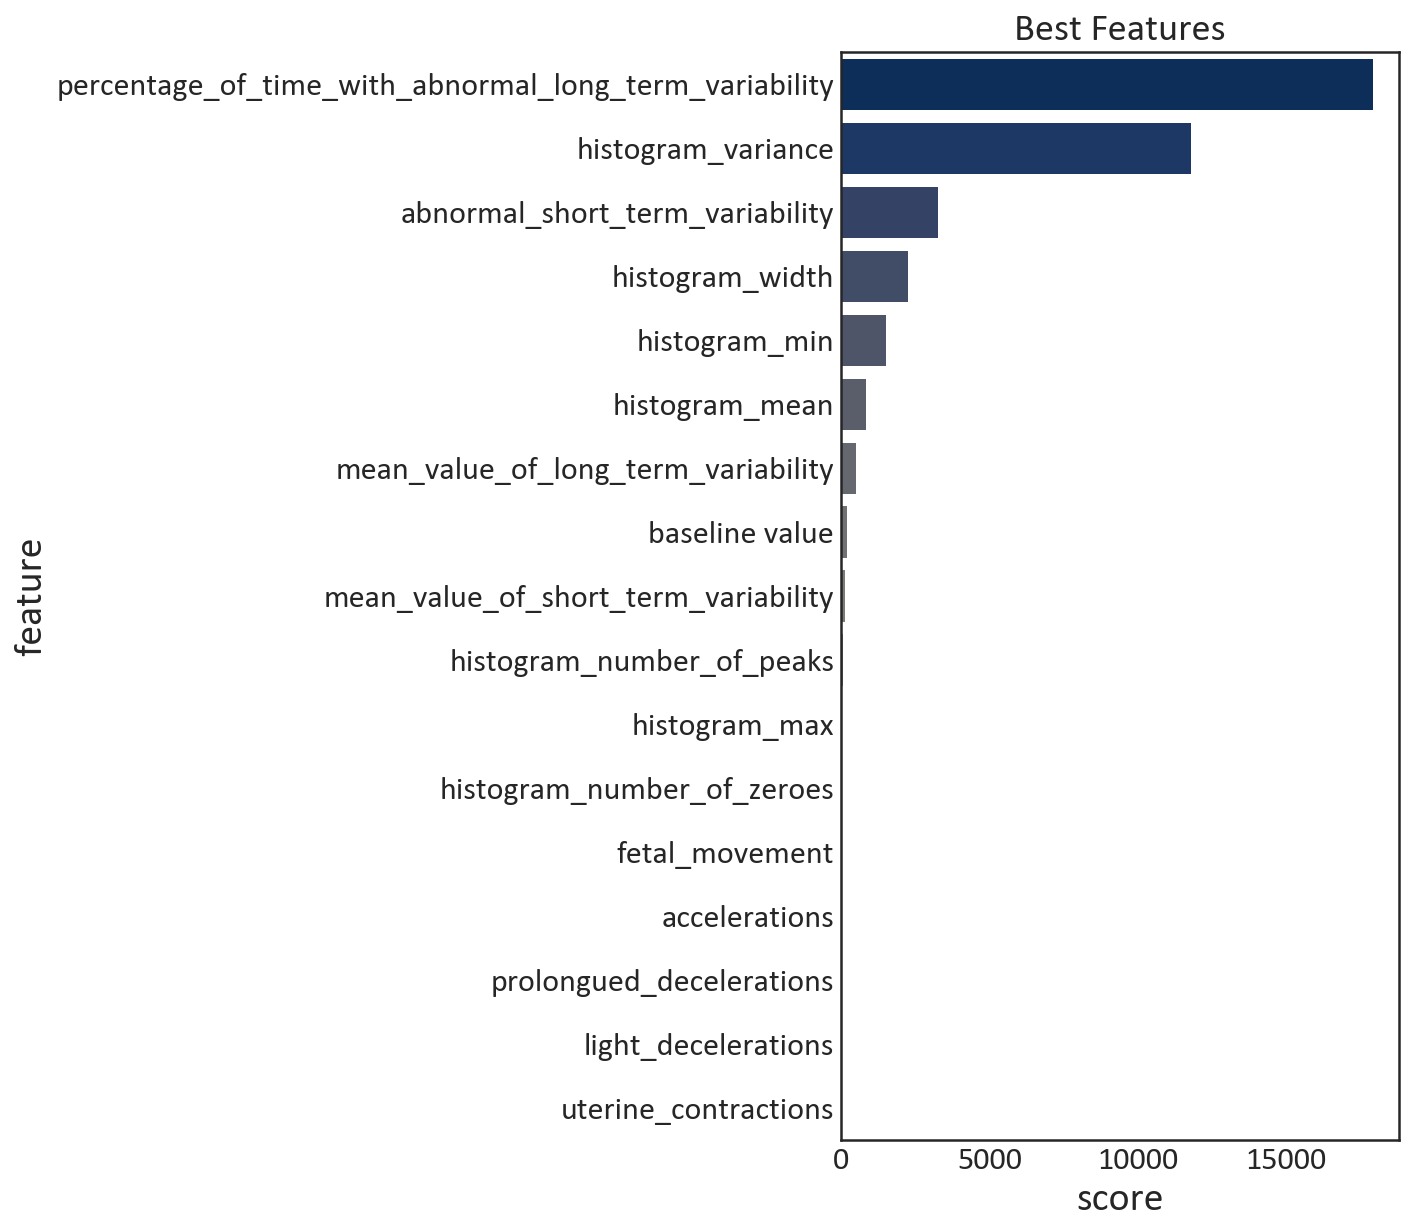

In [25]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2


best_features = SelectKBest(score_func=chi2,k='all')

X = df.drop(['Target','histogram_tendency'],axis=1)
y = df['Target']

fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=False,inplace=True)

plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,10
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16
plt.rcParams['legend.frameon']=True


sns.barplot(data = feature_score, 
            x='score', 
            y='feature',
            palette='cividis',
           ).set(title='Best Features')

Drop low importance features:

In [26]:
list_drop = ['uterine_contractions',
             'light_decelerations',
             'prolongued_decelerations',
#              'accelerations',
             'fetal_movement',
             'histogram_number_of_zeroes',
             'histogram_max',
             'histogram_number_of_peaks',
             'mean_value_of_short_term_variability',
            ]
df.drop(list_drop,axis=1,inplace=True)

# **Modelling**<a name="model"></a>


### Prep for Modelling

### Oversampling

In [27]:
# import library
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = SMOTE(n_jobs=-1)
# oversamp = RandomOverSampler(random_state=0)

In [28]:
X = df.drop(['Target'],axis=1)
y = df['Target']
feature_names = list(X.columns)

### Split into test and training
In this section the data is split into test and training sets using stratified sampling. 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)
X_train,y_train = oversamp.fit_resample(X_train, y_train)

### Normalize features
a minmax scaler is used on the features to put them all in the same order of size.

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Import Metrics

Imports the libraries that will be used to evaluate the models later on

In [31]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score, plot_confusion_matrix,matthews_corrcoef
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','time to train','time to predict','total time'])


# Machine Learning Models

## Logistic Regression

In [32]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
# y_pred_final = model.predict(df_test_scaled) # these are the predictions for the competition
end_predict = time.time()

Wall time: 140 ms


In [33]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
# print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 81.22%
Recall: 81.22%
Precision: 87.59%
F1-Score: 83.05%
MCC: 61.22%
time to train: 0.14 s
time to predict: 0.00 s
total: 0.14 s


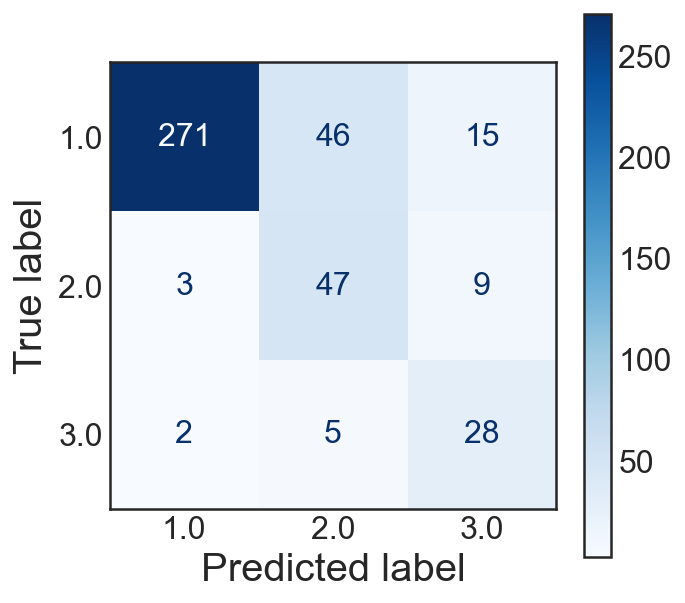

In [34]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [35]:
lr = model

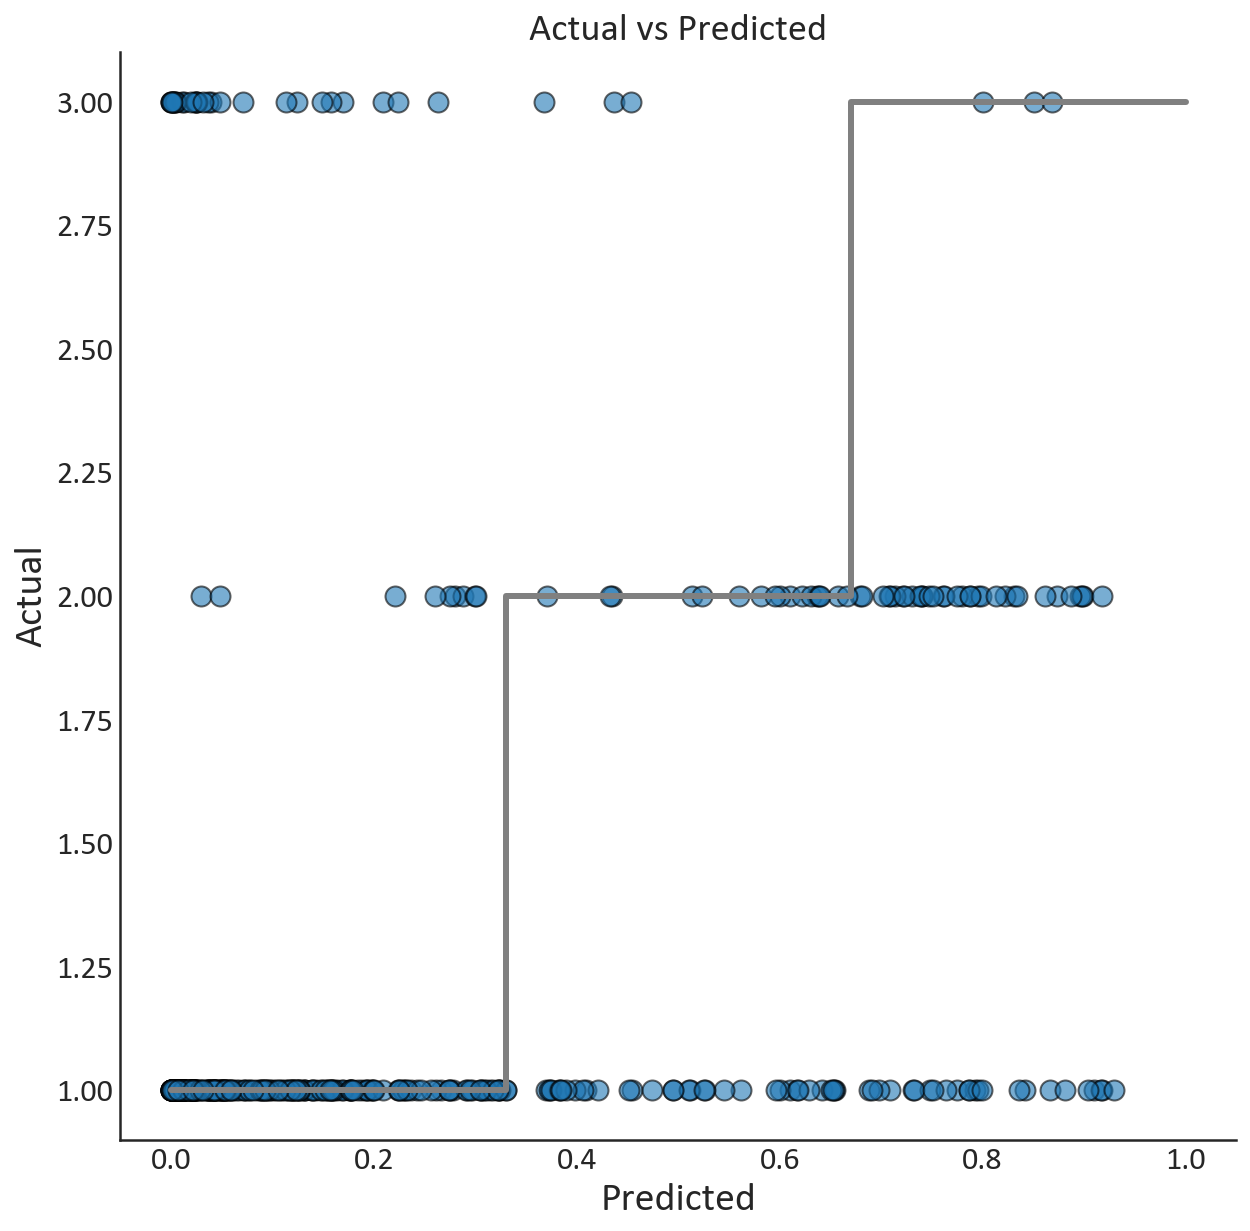

In [36]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')

y_pred_plot = model.predict_proba(X_test)
g = sns.scatterplot(y=y_test,
                x=y_pred_plot[:,1],
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)

f = sns.lineplot(x=[0,0.33,0.67,1],
             y=[1,1,2,3],
             linewidth=3,
             color='gray',
             ax=ax,
                drawstyle='steps-pre')


sns.despine()

In [37]:
y_pred_plot = model.predict_proba(X_test)
fig = px.scatter(y=y_test,x=y_pred_plot[:,1],opacity=0.5,labels=dict(x="Predicted", y="Actual"))

fig.add_trace(go.Scatter(x=[0,0.5,0.5,1],
                         y=[0,0,1,1],
                         mode='lines',
                         line=dict(
                             color='gray', 
                             width=1.5)
                        )
             )

fig.update_xaxes(showgrid = False, showline = True, gridwidth = 0.05, linecolor = 'gray', zeroline = False, linewidth = 2)
fig.update_yaxes(showline = True, gridwidth = 0.05, linecolor = 'gray', linewidth = 2, zeroline = False)

fig.update_traces(marker=dict(size=10,
                              # line=dict(width=2,
                              #           color='DarkSlateGrey')
                             ),
                  selector=dict(mode='markers'))

# General Styling
fig.update_layout(height=600,
              margin=dict(b=50,r=30,l=100,t=100),
              # title = "Transported Probability by age",                  
              hoverlabel=dict(font_color="floralwhite"),
              showlegend=False)
fig.show()

## KNN

In [38]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
# y_pred_final = model.predict(df_test_scaled) # these are the predictions for the competition
end_predict = time.time()

Wall time: 299 ms


In [39]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
# print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 89.20%
Recall: 89.20%
Precision: 91.42%
F1-Score: 89.84%
MCC: 74.66%
time to train: 0.29 s
time to predict: 0.00 s
total: 0.30 s


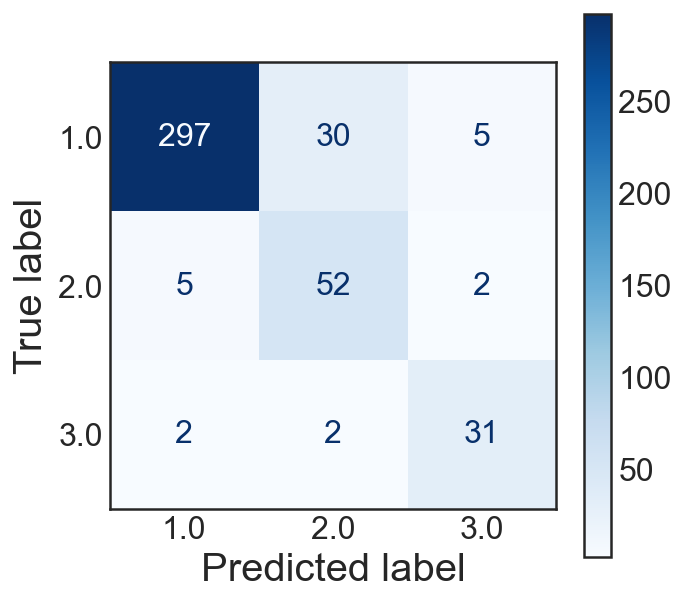

In [40]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

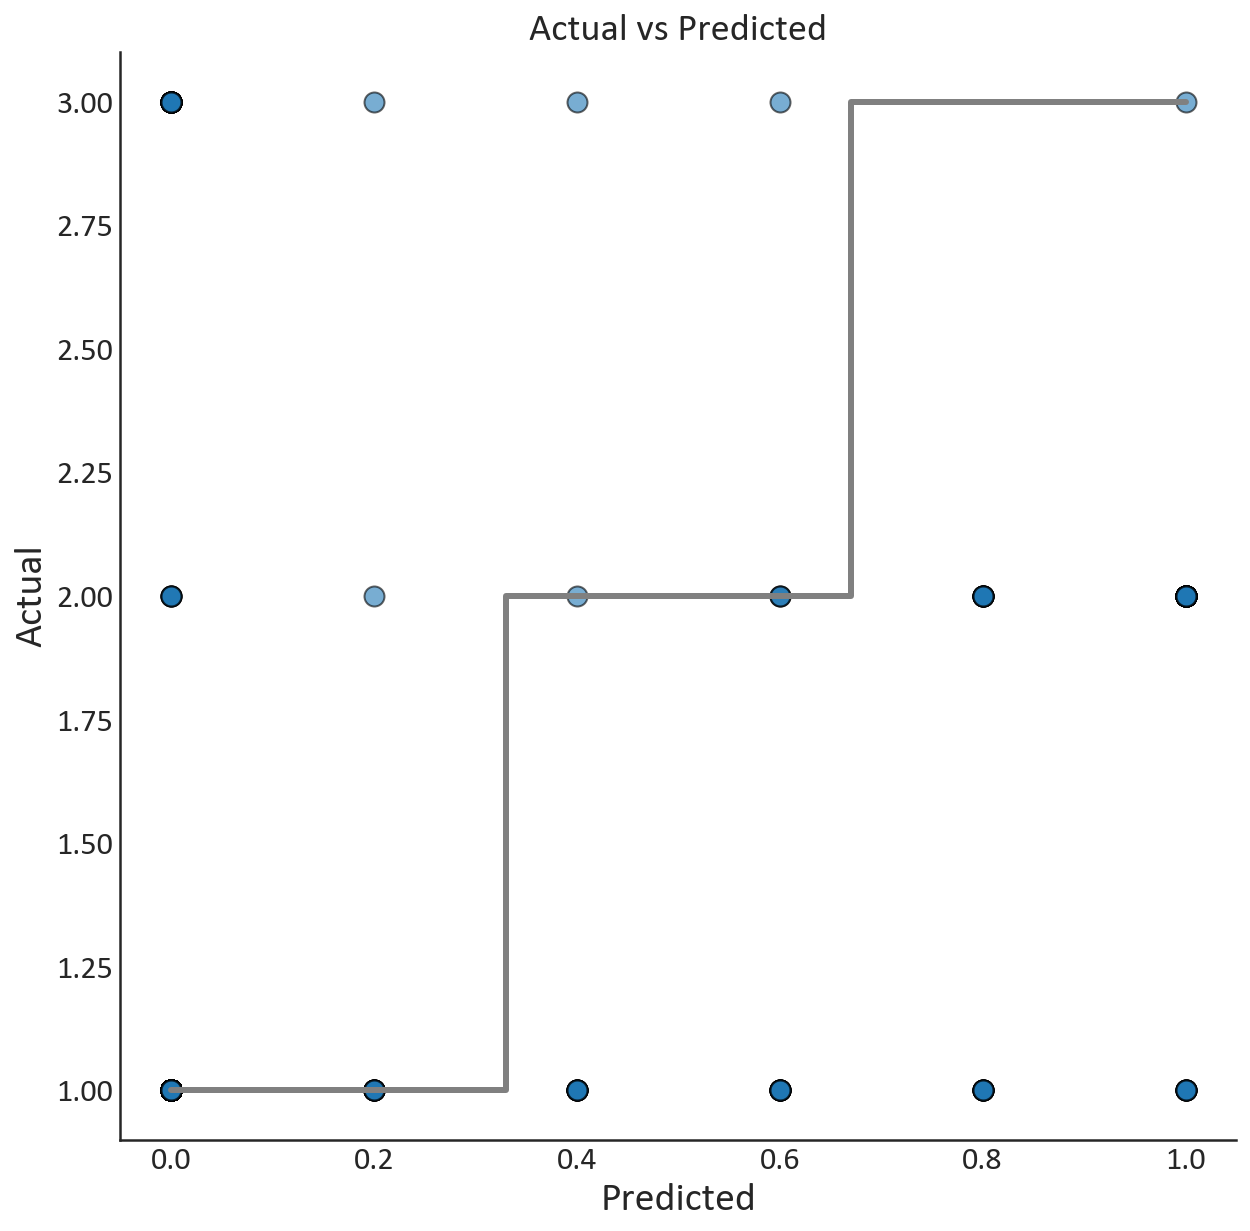

In [41]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')

y_pred_plot = model.predict_proba(X_test)
g = sns.scatterplot(y=y_test,
                x=y_pred_plot[:,1],
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)

f = sns.lineplot(x=[0,0.33,0.67,1],
             y=[1,1,2,3],
             linewidth=3,
             color='gray',
             ax=ax,
                drawstyle='steps-pre')


sns.despine()

In [42]:
knn = model

## SVM

In [43]:
%%time
from sklearn.svm import SVC
start = time.time()
model = SVC(probability=True).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
# y_pred_final = model.predict(df_test_scaled) # these are the predictions for the competition
end_predict = time.time()

Wall time: 35.1 s


In [44]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
# print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['SVM'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 86.38%
Recall: 86.38%
Precision: 90.25%
F1-Score: 87.46%
MCC: 70.17%
time to train: 35.07 s
time to predict: 0.03 s
total: 35.09 s


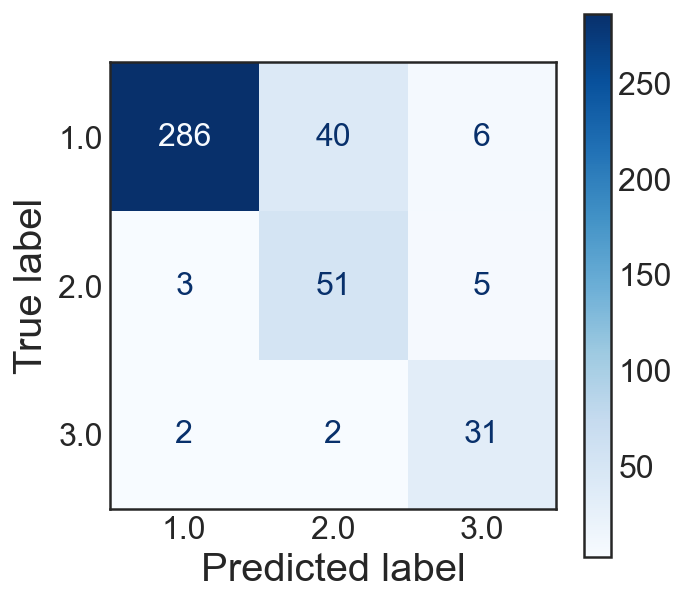

In [45]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [46]:
svm = model

## Decision Tree

In [47]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 984 ms


In [48]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
# print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 81.92%
Recall: 81.92%
Precision: 89.75%
F1-Score: 83.80%
MCC: 65.40%
time to train: 0.98 s
time to predict: 0.00 s
total: 0.98 s


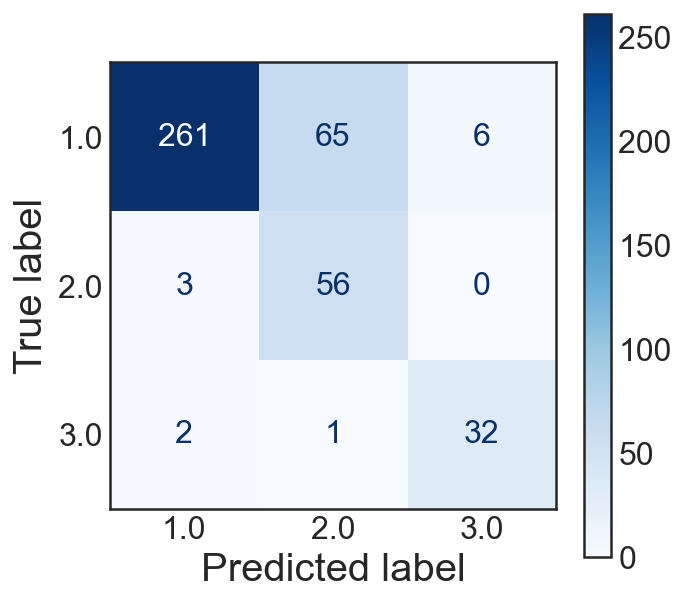

In [49]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

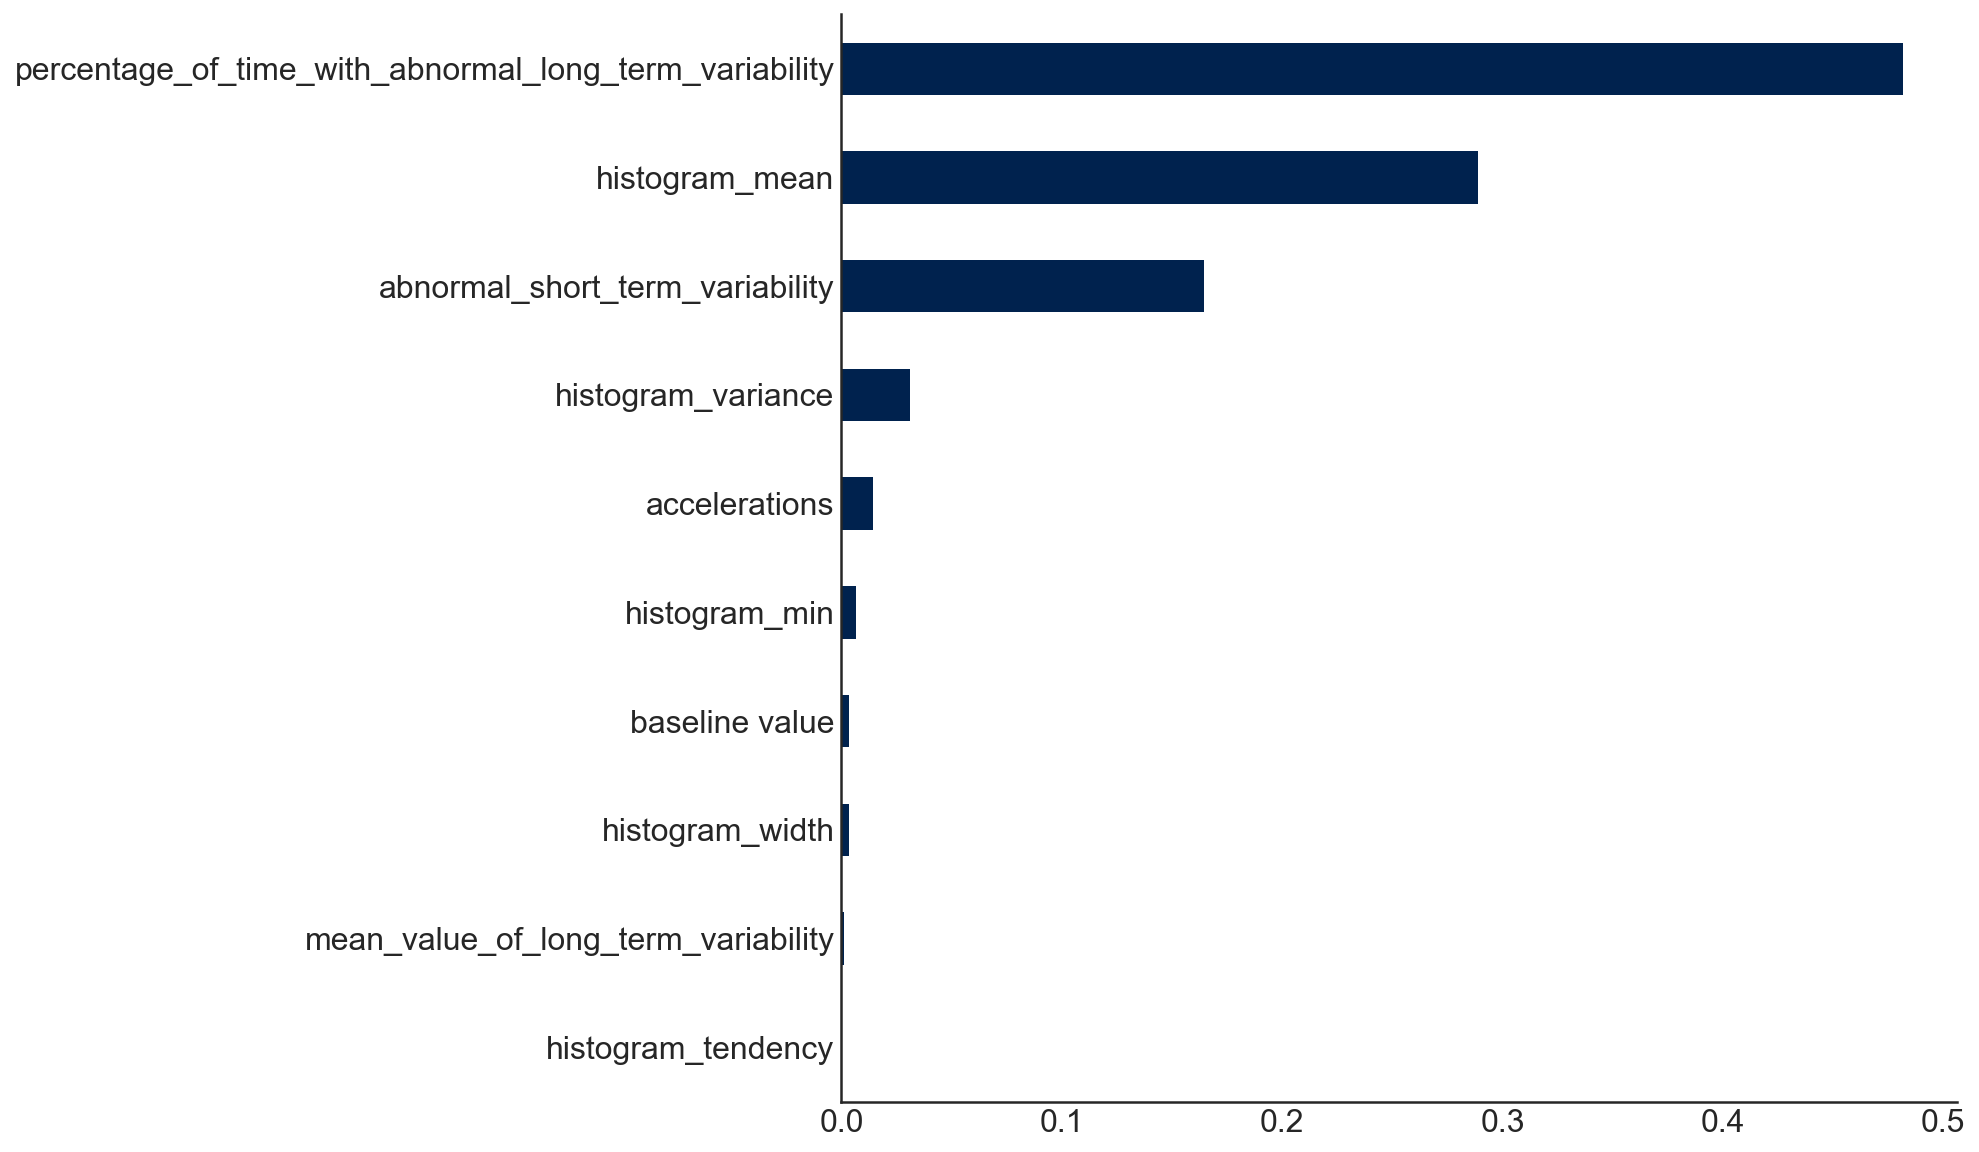

In [50]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
# feat_importances = pd.Series(model.feature_importances_,)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh',cmap='cividis').invert_yaxis()
sns.despine()
plt.show()

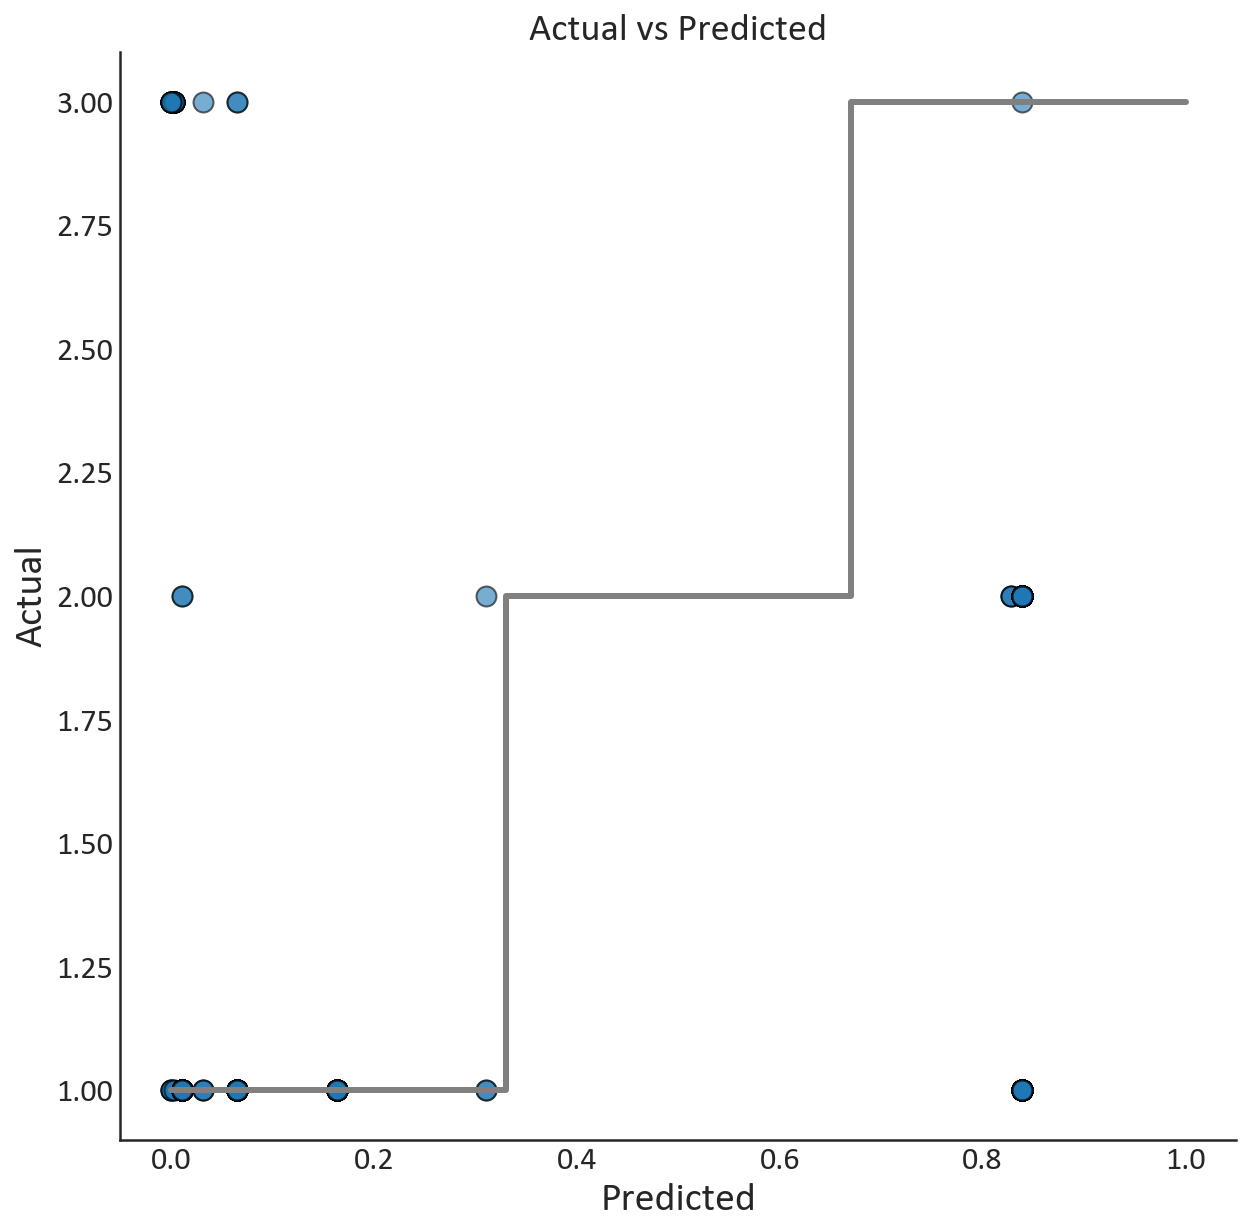

In [51]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')

y_pred_plot = model.predict_proba(X_test)
g = sns.scatterplot(y=y_test,
                x=y_pred_plot[:,1],
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)

f = sns.lineplot(x=[0,0.33,0.67,1],
             y=[1,1,2,3],
             linewidth=3,
             color='gray',
             ax=ax,
                drawstyle='steps-pre')


sns.despine()

In [52]:
from sklearn import tree

In [53]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Normal','Suspect','Pathological'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [54]:
dtree = model

## Extra Trees

In [55]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(n_estimators=500,random_state=0,n_jobs=-1).fit(X_train,y_train)
# model = ExtraTreesClassifier(max_depth=40,random_state=0,n_estimators=100,n_jobs=10).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
# y_pred_final = model.predict(df_test_scaled) # these are the predictions for the competition
end_predict = time.time()

Wall time: 3.3 s


In [56]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
# print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 93.66%
Recall: 93.66%
Precision: 94.01%
F1-Score: 93.78%
MCC: 83.03%
time to train: 2.88 s
time to predict: 0.42 s
total: 3.30 s


In [57]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

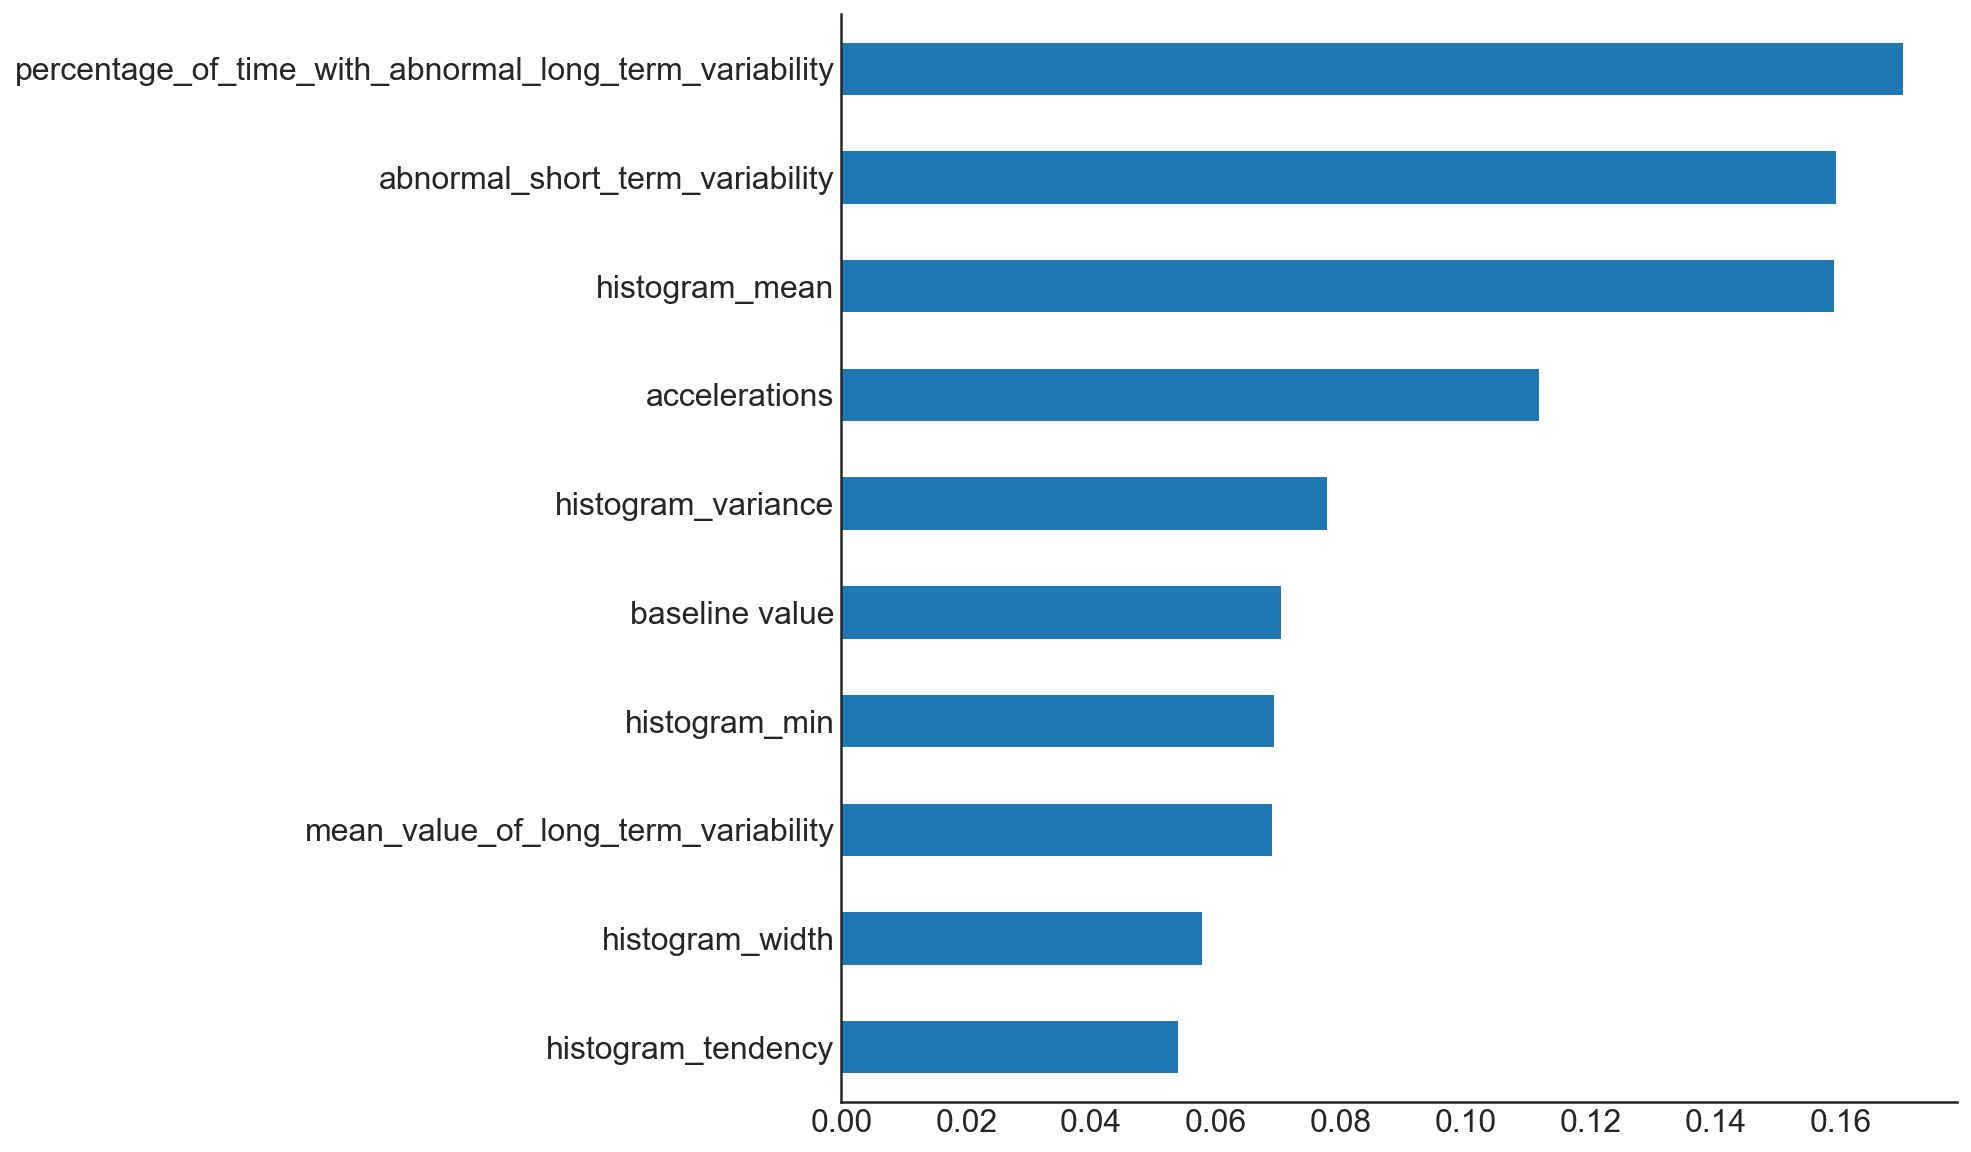

In [58]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
sns.despine()
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
# feat_importances = pd.Series(model.feature_importances_,)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [59]:
xtree = model

In [60]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')

y_pred_plot = model.predict_proba(X_test)
g = sns.scatterplot(y=y_test,
                x=y_pred_plot[:,1],
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)

f = sns.lineplot(x=[0,0.33,0.67,1],
             y=[1,1,2,3],
             linewidth=3,
             color='gray',
             ax=ax,
                drawstyle='steps-pre')


sns.despine()

## Random Forest

In [61]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 500,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 1.75 s


In [62]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
# print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 94.84%
Recall: 94.84%
Precision: 94.92%
F1-Score: 94.87%
MCC: 86.11%
time to train: 1.66 s
time to predict: 0.09 s
total: 1.75 s


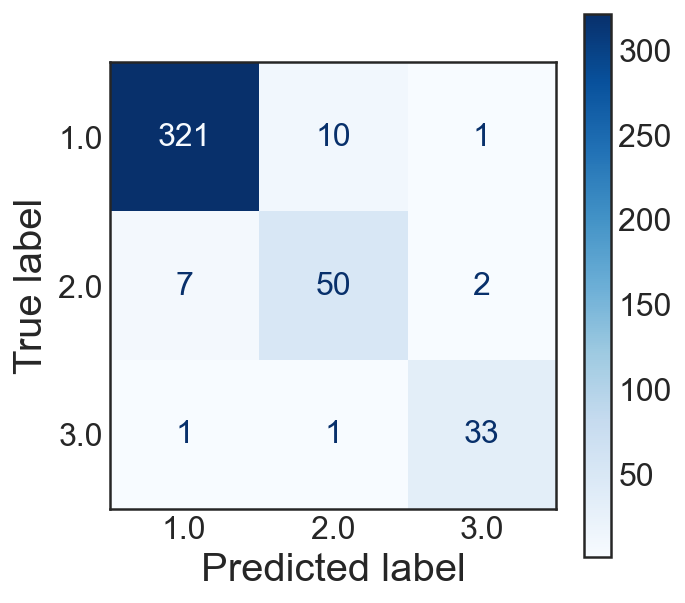

In [63]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

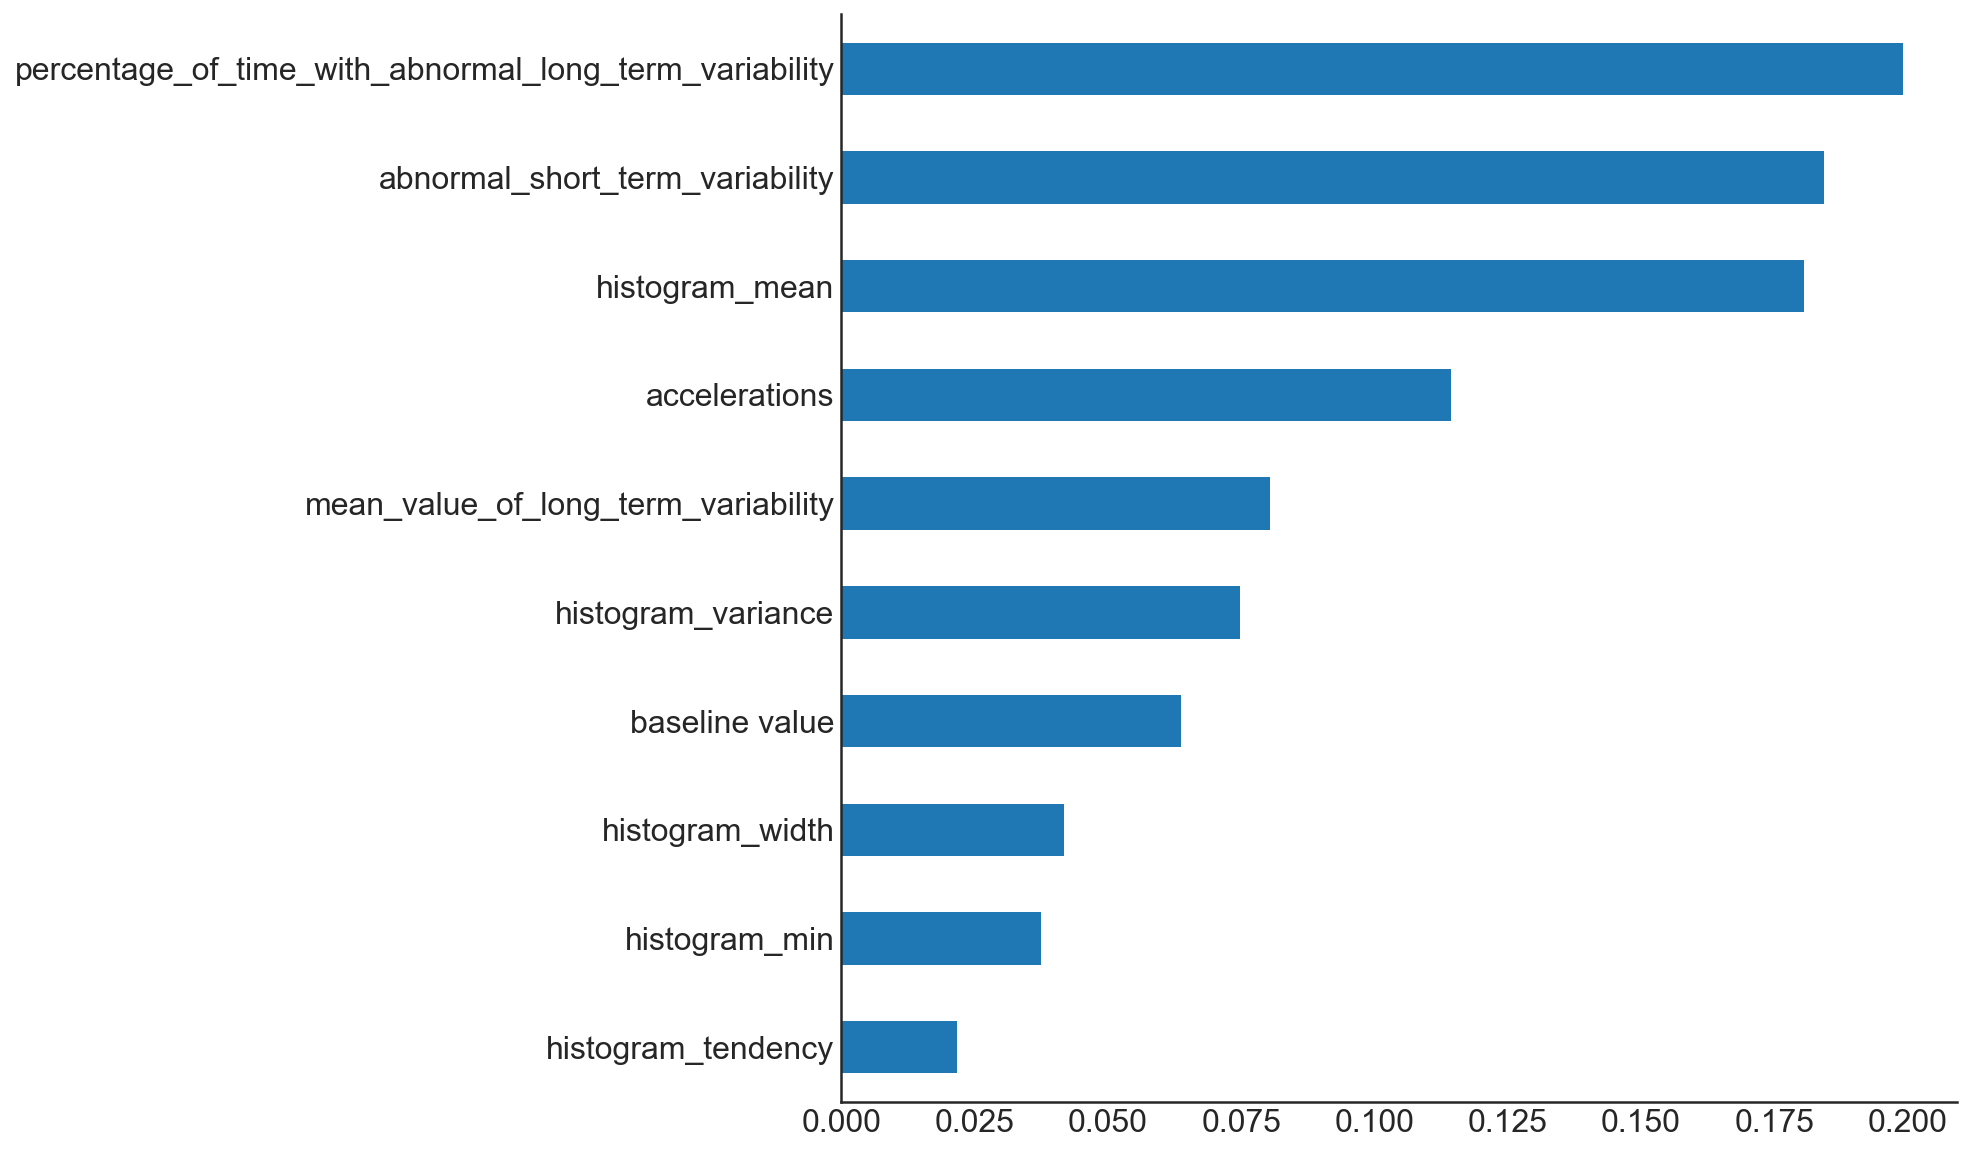

In [64]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
# feat_importances = pd.Series(model.feature_importances_,)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [65]:
rf = model

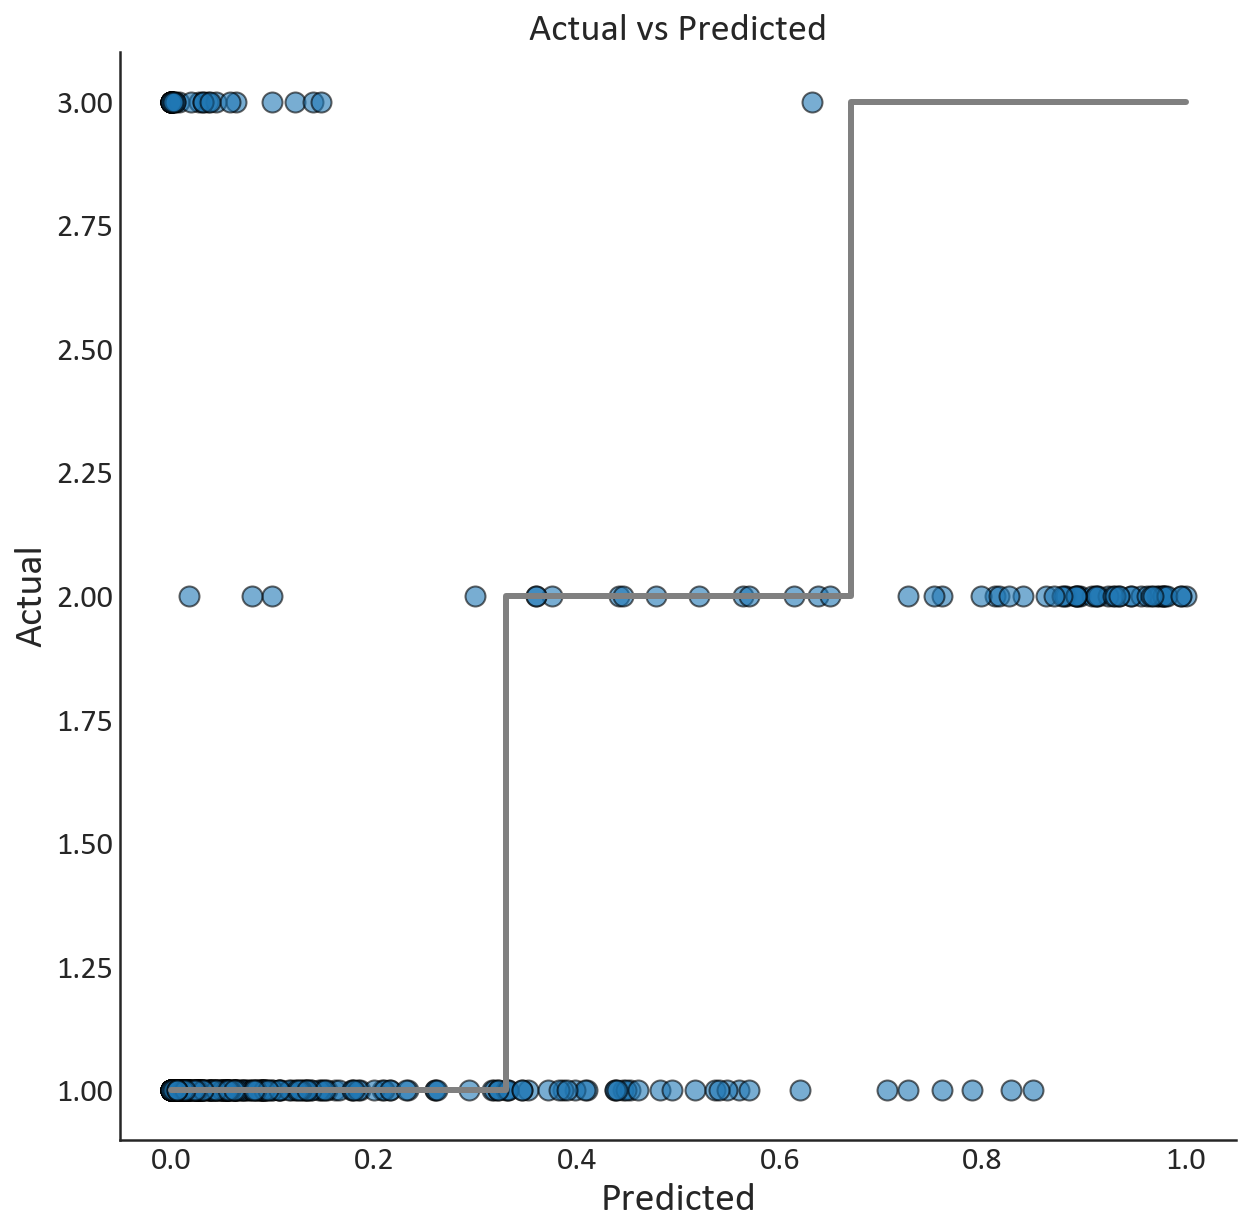

In [66]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')

y_pred_plot = model.predict_proba(X_test)
g = sns.scatterplot(y=y_test,
                x=y_pred_plot[:,1],
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)

f = sns.lineplot(x=[0,0.33,0.67,1],
             y=[1,1,2,3],
             linewidth=3,
             color='gray',
             ax=ax,
                drawstyle='steps-pre')


sns.despine()

## Gradient Boosting Classifier

In [67]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier(n_estimators=100).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 5.83 s


In [68]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
# print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 93.19%
Recall: 93.19%
Precision: 94.01%
F1-Score: 93.43%
MCC: 82.89%
time to train: 5.77 s
time to predict: 0.06 s
total: 5.83 s


In [69]:
gbc = model

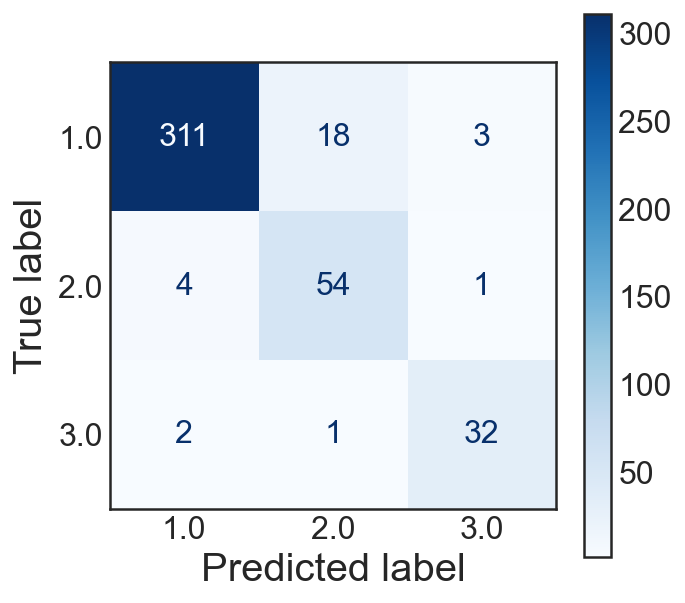

In [70]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [71]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
# feat_importances = pd.Series(model.feature_importances_,)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

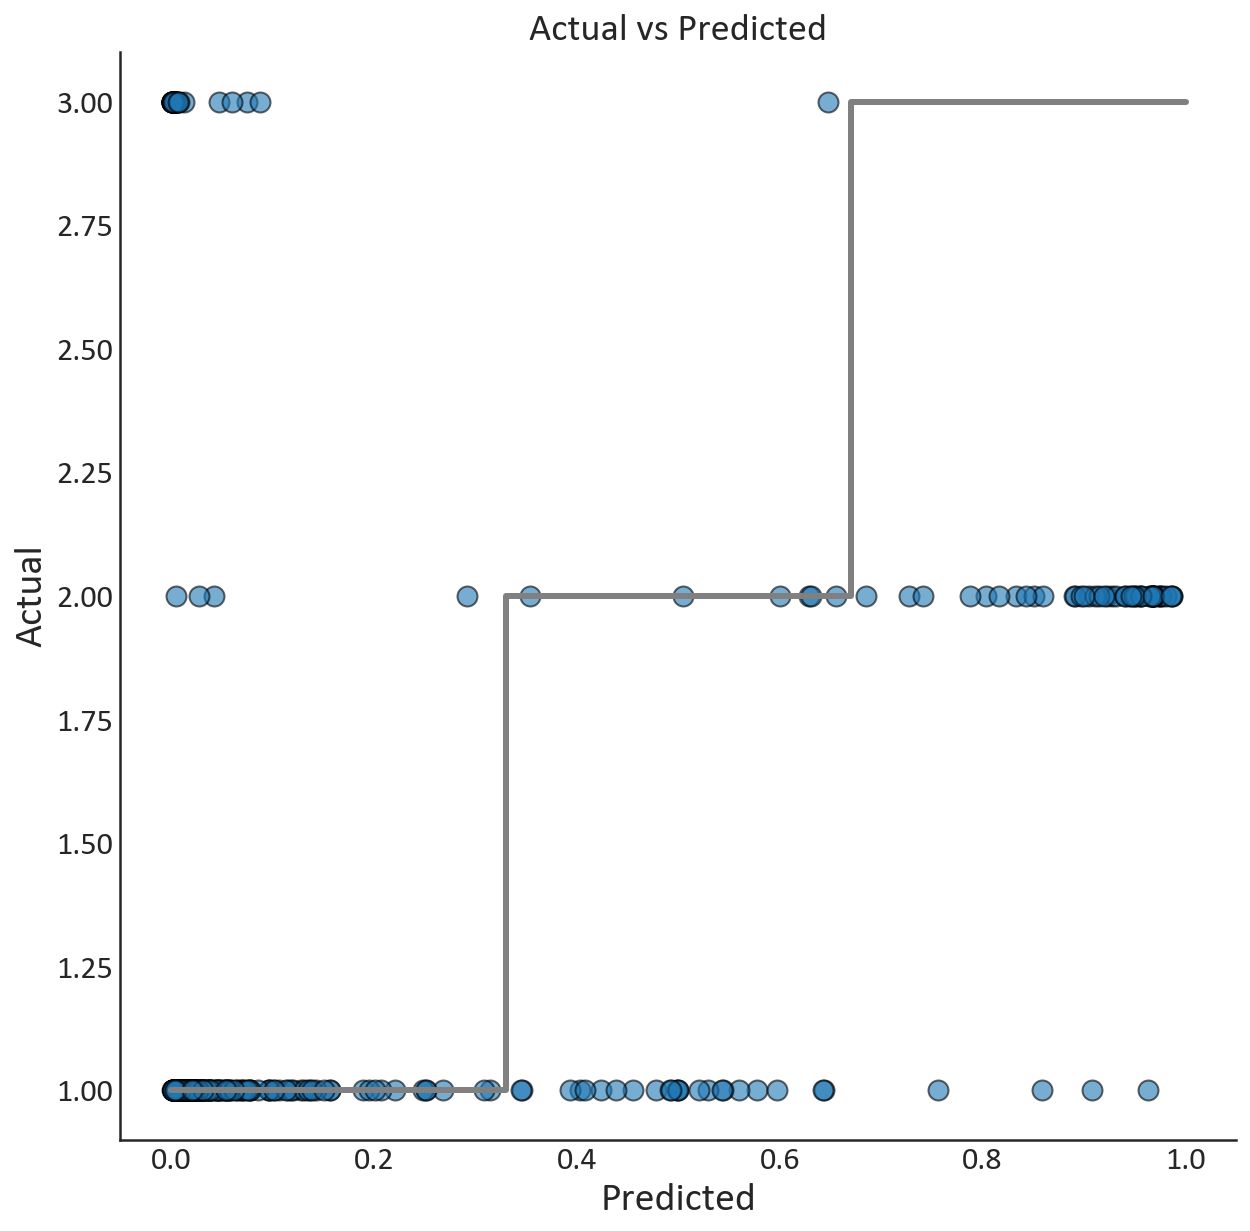

In [72]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')

y_pred_plot = model.predict_proba(X_test)
g = sns.scatterplot(y=y_test,
                x=y_pred_plot[:,1],
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)

f = sns.lineplot(x=[0,0.33,0.67,1],
             y=[1,1,2,3],
             linewidth=3,
             color='gray',
             ax=ax,
                drawstyle='steps-pre')


sns.despine()

## NN MLP

In [73]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (100,100,50,), 
                      activation='relu', 
                      solver='adam',
                      max_iter=200,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
# y_pred_final = model.predict(df_test_scaled) # these are the predictions for the competition
end_predict = time.time()

Wall time: 42.5 s


In [74]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
# print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['NN MLP'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.31%
Recall: 91.31%
Precision: 92.07%
F1-Score: 91.54%
MCC: 77.87%
time to train: 42.20 s
time to predict: 0.00 s
total: 42.20 s


In [75]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [76]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')

y_pred_plot = model.predict_proba(X_test)
g = sns.scatterplot(y=y_test,
                x=y_pred_plot[:,1],
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)

f = sns.lineplot(x=[0,0.33,0.67,1],
             y=[1,1,2,3],
             linewidth=3,
             color='gray',
             ax=ax,
                drawstyle='steps-pre')


sns.despine()

mlp = model

# **Evaluate** <a name='Evaluate'></a>

The models are compared in this chapter to determine which give the best performance. It seems that the winner is the Extra Classifier with a good performance on speed and prediction. 

The MLP takes much longer to train in Keras than through sci-kit learn. I don't think that the verbosity of the output could have such a big impact. It is unclear why Keras is underperforming. 

### model_performance

In [77]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='RdYlBu_r').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score':'{:.2%}',
                                                                     'ROC AUC':'{:.2%}',
                                                                     'time to train':'{:.3f}',
                                                                     'time to predict':'{:.3f}',
                                                                     'total time':'{:.3f}',
                                                                     })